# **Author: Sri Sudheera Chitipolu**

### *Github: https://github.com/sudheera96*

## Acquire the Data

Collected data from kaggle

*https://www.kaggle.com/hellbuoy/car-price-prediction*

## General Description: 
For understanding pricing dynamics of the new market in the different cars for business growth, we will predict the car’s prices depending on different independent variables. 

In [2]:
import pandas as pd # imported pandas as pd
cp_data = pd.read_csv("carPrice_Assignment.csv") # pulled data from csv file to pandas dataframe
print(cp_data.keys()) # display a list of the names of the fields
cp_data.head(10) # table display of the first few lines in the DataFrame

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [3]:
df = cp_data.drop(columns=["car_ID","CarName","highwaympg","citympg","peakrpm","symboling"])

In [4]:
df_num_cols = df.select_dtypes(exclude = 'object')

In [5]:
df_num_cols.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,45400.000000


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num_cols)

# statistics of scaled data
pd.DataFrame(df_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,-1.496906e-15,3.730349e-15,9.964929e-16,-4.408398e-16,9.910771e-17,5.415722e-19,2.267021e-15,2.126483e-15,-3.115394e-16,1.914458e-16,1.581391e-16
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00
min,-2.023713e+00,-2.677244e+00,-2.620512e+00,-2.430664e+00,-2.055348e+00,-1.586561e+00,-2.923049e+00,-3.789311e+00,-7.931011e-01,-1.422573e+00,-1.023762e+00
25%,-7.085959e-01,-6.296552e-01,-8.447824e-01,-7.076263e-01,-7.904486e-01,-7.199469e-01,-6.653141e-01,-4.648342e-01,-3.892993e-01,-8.648707e-01,-6.887281e-01
50%,-2.924196e-01,-6.900603e-02,-1.905661e-01,1.538927e-01,-2.725519e-01,-1.662771e-01,-7.312136e-02,1.105560e-01,-2.883489e-01,-2.311186e-01,-3.741476e-01
75%,6.065210e-01,7.354037e-01,4.636501e-01,7.282388e-01,7.305117e-01,3.392475e-01,9.262039e-01,4.941494e-01,-1.873985e-01,3.012332e-01,4.048375e-01
max,3.686225e+00,2.766741e+00,2.987056e+00,2.492302e+00,2.907988e+00,4.792679e+00,2.258638e+00,2.923575e+00,3.244916e+00,4.661448e+00,4.030858e+00


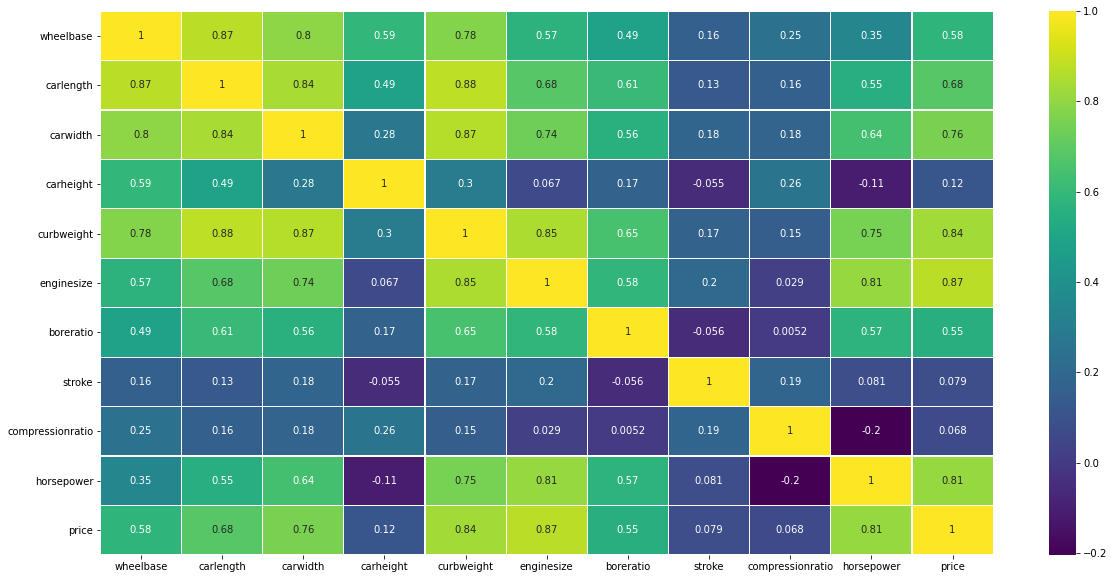

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
Corr_mat = df_num_cols.corr()
sns.heatmap(Corr_mat, cmap="viridis",annot=True,linewidths=0.1)
plt.show()

from heat map we can observe  carweight and enginsize are highly correlated with price

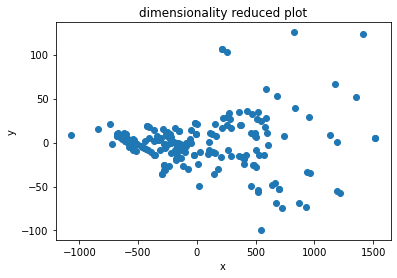

In [8]:
X = df_num_cols[["wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower"]]
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)
final_df = pd.DataFrame(pca_data, columns=['curbweight', 'enginesize'])
plt.scatter(final_df['curbweight'], final_df['enginesize'])
plt.xlabel("x")
plt.ylabel("y")
plt.title('dimensionality reduced plot')
plt.show()



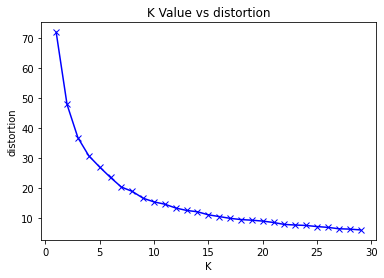

In [13]:
#Determining the number of clusters using Elbow Method

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X)
data = min_max_scaler.fit_transform(X)
final_df = pd.DataFrame(data, columns=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower'])
from sklearn.cluster import KMeans
distortion = []
k_values = range(1,30)
for k in k_values:
    kmeans_clf = KMeans(n_clusters=k)
    kmeans_clf.fit(final_df)
    distortion.append(kmeans_clf.inertia_)
plt.plot(k_values, distortion, 'bx-')
plt.xlabel('K')
plt.ylabel('distortion')
plt.title('K Value vs distortion')
plt.show()


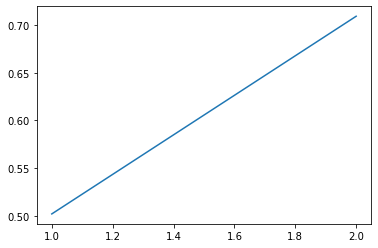

In [14]:
#dimension reduction
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(final_df)
final_df = pd.DataFrame(pca_data, columns=['curbweight', 'enginesize'])
cumulative_sums = np.cumsum(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt
d_values = [i+1 for i in range(0,len(cumulative_sums))]
plt.plot(d_values, cumulative_sums)
plt.show()

In [15]:
kmeans_clf = KMeans(n_clusters=7)
kmeans_clf.fit(final_df)
#Evaluation
import math
RMS_average = math.sqrt(kmeans_clf.inertia_ / len(final_df))
print("The cluster distortion is ", kmeans_clf.inertia_)
print("Average Root Mean Square ", RMS_average)

The cluster distortion is  4.837943536469254
Average Root Mean Square  0.1536220185004178


The centroids are  [[ 0.76132614  0.63566502]
 [-0.0896109  -0.0536041 ]
 [ 0.41767761 -0.08483131]
 [-0.45915874  0.01728419]
 [-0.04785597  0.76042942]
 [ 0.98825905 -0.32999896]
 [ 0.12845366 -0.29816695]]


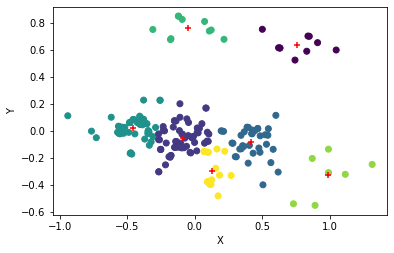

In [17]:
#Finding the centre of clusters
print("The centroids are ", kmeans_clf.cluster_centers_)

# Plot the centroids
cluster_x = [x for [x,y] in kmeans_clf.cluster_centers_]
cluster_y = [y for [x,y] in kmeans_clf.cluster_centers_]
plt.scatter(final_df['curbweight'], final_df['enginesize'], c=kmeans_clf.labels_)
plt.scatter(cluster_x, cluster_y, marker="+", color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("scaled")
plt.show()


I have applied dimensionality reduction since the data is more than 2 dimensional. I have taken number of clusters as 7

In [18]:
sum(pca.explained_variance_ratio_)

0.7091726929163102